In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [10]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [11]:
df['HbA1c_level'].value_counts()

HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

## Doing Exploratory Data Analysis with diabetes_prediction_dataset.csv

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Checking Duplicates

In [13]:
df.duplicated().sum()

3854

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

## Checking Missing Values

In [16]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [18]:
print(df['smoking_history'].value_counts().sum)

print(df['gender'].value_counts())



<bound method Series.sum of smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64>
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

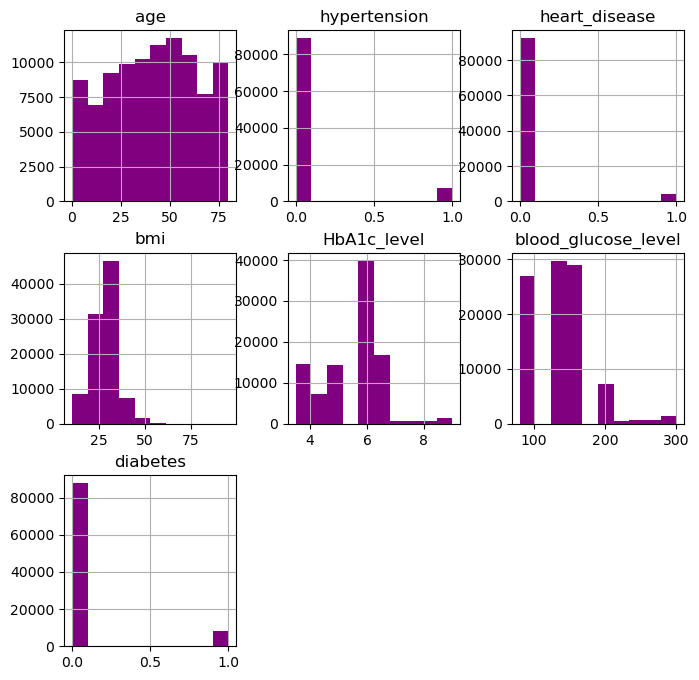

In [19]:
## Data Visualisation.
df.hist(figsize=(8,8),color='purple')

## Gender

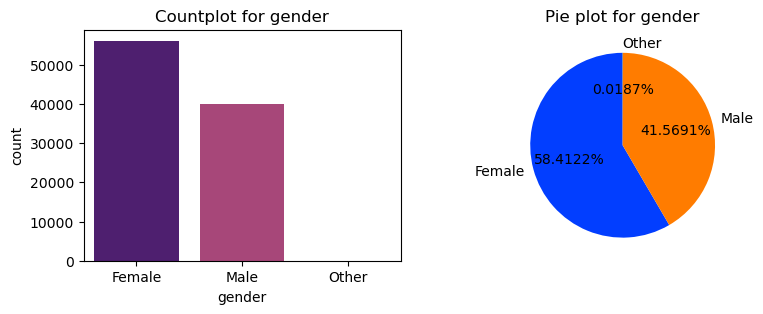

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# Countplot

sns.countplot(x=df['gender'],data=df ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for gender')

# Pie plot

data_counts = df['gender'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('bright'))

ax[1].set_title(f'Pie plot for gender')

plt.show()

## HyperTension

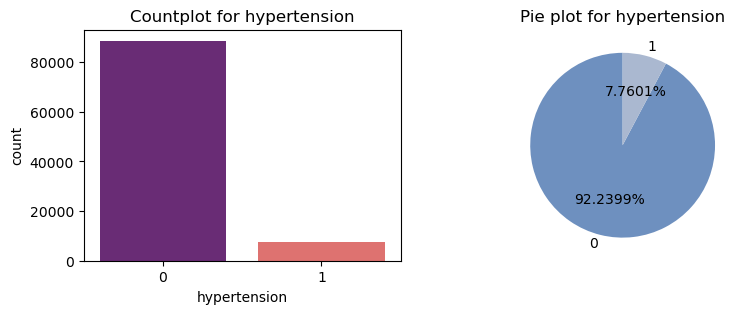

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# Countplot

sns.countplot(x=df['hypertension'],data=df ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for hypertension')

# Pie plot

data_counts = df['hypertension'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

ax[1].set_title(f'Pie plot for hypertension')

plt.show()


## Heart Disease

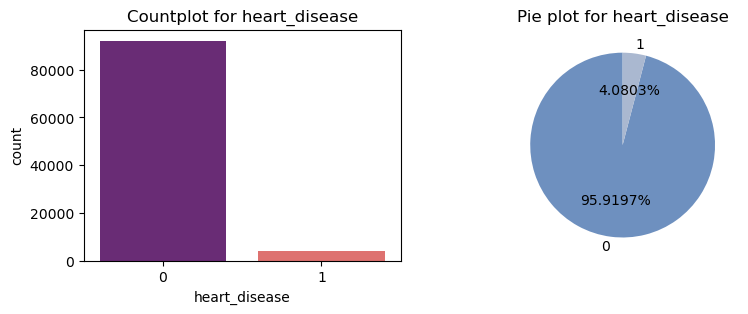

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# Countplot

sns.countplot(x=df['heart_disease'],data=df ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for heart_disease')

# Pie plot

data_counts = df['heart_disease'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

ax[1].set_title(f'Pie plot for heart_disease')

plt.show()

## Smoking History

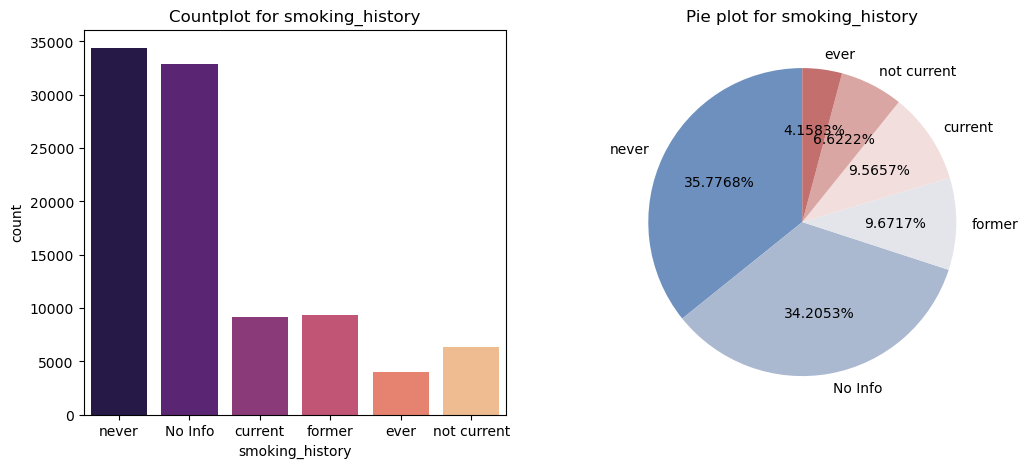

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Countplot

sns.countplot(x=df['smoking_history'],data=df ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for smoking_history')

# Pie plot

data_counts = df['smoking_history'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

ax[1].set_title(f'Pie plot for smoking_history')

plt.show()

In [24]:
print(df['age'].mean())

41.79432571297817


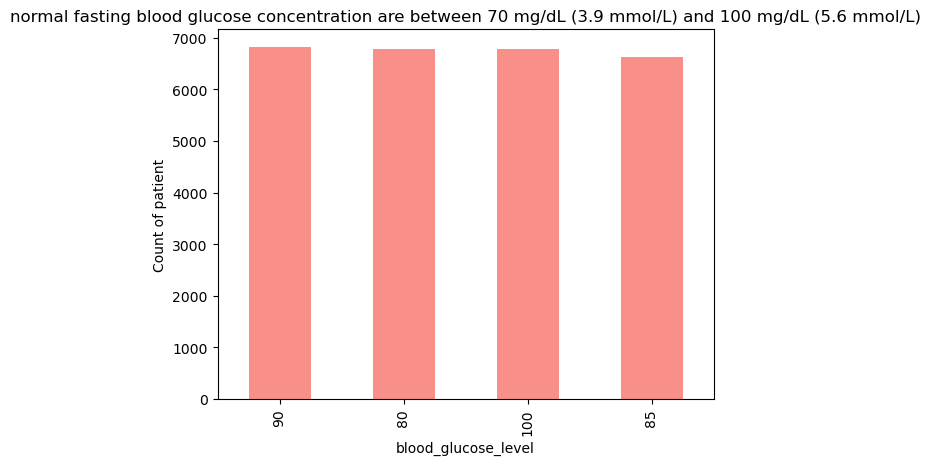

In [25]:
blood_glucose_level_above_70_and_less_than_100 = df[(df['blood_glucose_level'] <= 100) & (df['blood_glucose_level'] >= 70)]

blood_glucose_level_above_70_and_less_than_100['blood_glucose_level'].value_counts().plot(kind='bar', color='#F89089')

plt.title('normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L)')

plt.xlabel('blood_glucose_level')

plt.ylabel('Count of patient')

plt.show()

#### The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended ** **bold text**

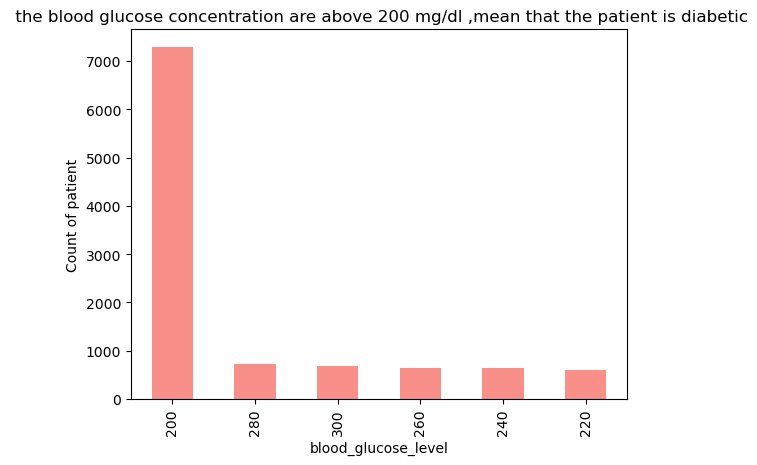

In [26]:
blood_glucose_level_above_200=df[df['blood_glucose_level']>=200]

blood_glucose_level_above_200['blood_glucose_level'].value_counts().plot(kind='bar', color='#F89089')

plt.title(' the blood glucose concentration are above 200 mg/dl ,mean that the patient is diabetic')

plt.xlabel('blood_glucose_level')

plt.ylabel('Count of patient')

plt.show()

**A normal A1C level is below 5.7%, a level of 5.7% to 6.4% indicates prediabetes, and a level of 6.5% or more indicates diabetes.**

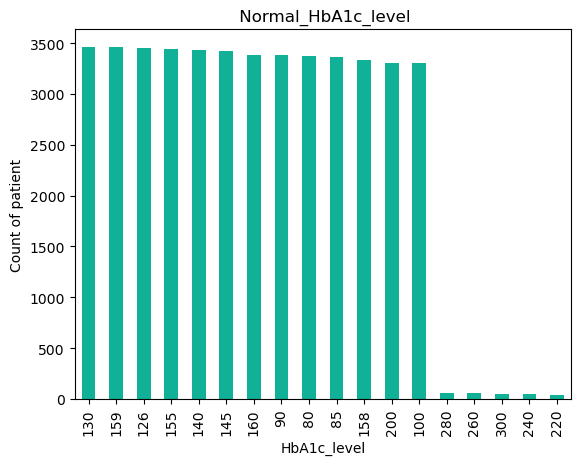

In [27]:
Normal_HbA1c_level=df[df['HbA1c_level']<=5.7]

Normal_HbA1c_level['blood_glucose_level'].value_counts().plot(kind='bar', color='#11B198')

plt.title(' Normal_HbA1c_level')

plt.xlabel('HbA1c_level')

plt.ylabel('Count of patient')

plt.show()

## count plot of male and female wrt Hypertension.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

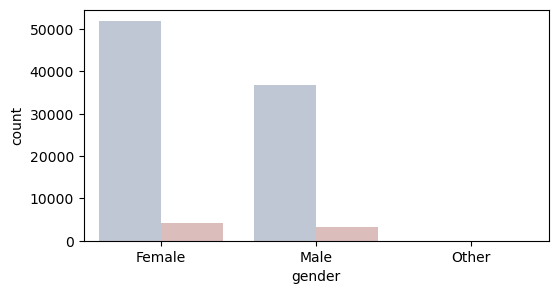

In [28]:
plt.figure(figsize=(6, 3))

sns.countplot(x='gender', hue='hypertension', data=df, palette='vlag')

plt.title('Countplot of male and female with respect to hypertension')

plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

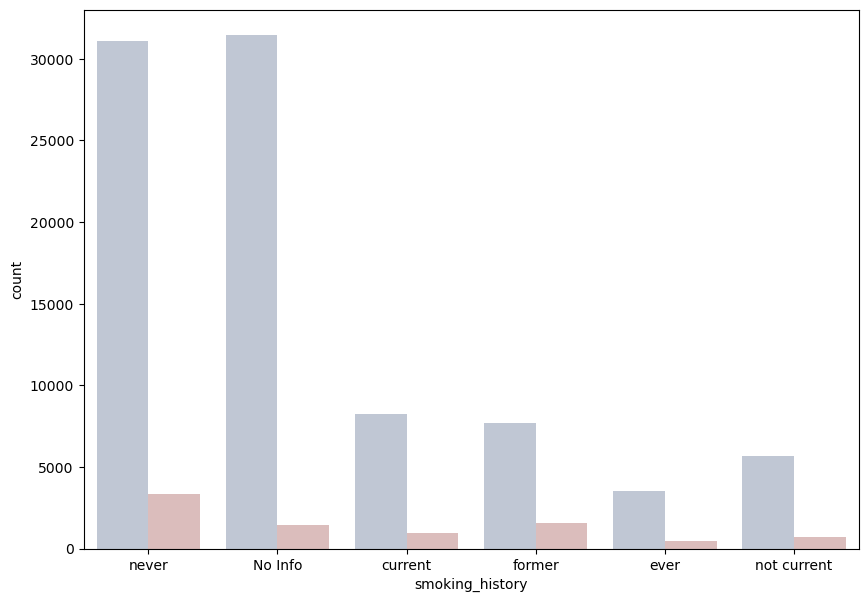

In [ ]:
plt.figure(figsize=(10, 7))

sns.countplot(x='smoking_history', hue='diabetes', data=df, palette='vlag')

plt.title('Countplot of smoking history with respect to diabetes')

plt.show()


## Converting Categorical Features into Numeriacal Features.

In [29]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()

In [31]:
df['gender']=le1.fit_transform(df['gender'])
df['smoking_history']=le1.fit_transform(df['smoking_history'])

In [32]:
df['smoking_history'].value_counts()

smoking_history
4    34398
0    32887
3     9299
1     9197
5     6367
2     3998
Name: count, dtype: int64

In [33]:
df['gender'].value_counts()

gender
0    56161
1    39967
2       18
Name: count, dtype: int64

In [34]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [48]:
df.tail(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0
99999,0,57.0,0,0,1,22.43,6.6,90,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int32  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int32  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.6 MB


## Splitting dataset into Independent and dependent features.

In [35]:
X=df.drop('diabetes',axis=1)
y=df['diabetes']

In [36]:
## dividing the X and y data into training data and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
X_train.value_counts().sum(),X_test.value_counts().sum(),y_train.value_counts().sum(),y_test.value_counts().sum()

(72109, 24037, 72109, 24037)

## Applying Logistic Regression Model.

In [38]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression(max_iter=3000)

In [39]:
regression.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [40]:
y_pred=regression.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [64]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.957482214918667
[[21650   220]
 [  802  1365]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21870
           1       0.86      0.63      0.73      2167

    accuracy                           0.96     24037
   macro avg       0.91      0.81      0.85     24037
weighted avg       0.95      0.96      0.95     24037



****Checking for the over and under fiting ****

In [71]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred_train = regression.predict(X_train)
y_pred_test = regression.predict(X_test)

# Calculate accuracy
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print("Training Score:", train_score * 100, '%')
print("Testing Score:", test_score * 100, '%')


Training Score: 95.9283861931243 %
Testing Score: 95.7482214918667 %


## Applying Support Vector Regression

In [72]:
from sklearn.svm import SVR

In [1]:
## svc=SVR(kernel='linear')
## svc.fit(X_train,y_train)
## y_pred1=svc.pred(X_test)
## print(accuracy_score(y_test,y_pred))

In [ ]:
# print(f'svm_Accuracy: {svm_accuracy:.2f}')

# print('\nsvm_Confusion Matrix:')

# print(svm_conf_matrix)

# print('\nsvm_Classification Report:')

# print(svm_classification_rep)

## Decision Tree Model

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred2=dtc.predict(X_test)

In [44]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.9494529267379457
[[21217   653]
 [  562  1605]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21870
           1       0.71      0.74      0.73      2167

    accuracy                           0.95     24037
   macro avg       0.84      0.86      0.85     24037
weighted avg       0.95      0.95      0.95     24037



In [46]:
params={
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' :  ['best','random'],
    'max_depth' :[1,2,3,4,5],
    'max_features' :['auto','sqrt','log2']

     
}

In [48]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid=params, cv=5)

In [49]:
grid.fit(X_train,y_train)

c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [50]:
y_pred3=grid.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9683820776303199
[[21870     0]
 [  760  1407]]


## Applying Random Forest Algorithm

In [51]:
# Define the parameter grid to search
from sklearn.ensemble import RandomForestClassifier
param_grid_ = {

    'n_estimators': [10, 50, 300, 200],  # Number of trees in the forest

    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree

    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node

    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node

}



# Initialize the grid search model

random_forest_model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_, cv=2, n_jobs=-1)


In [52]:
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred_rf=random_forest_model.predict(X_test)

In [54]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)

rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

rf_classification_rep = classification_report(y_test, y_pred_rf)

In [55]:
print(f'rf_Accuracy: {rf_accuracy:.3f}')

print('\nrf_Confusion Matrix:')

print(rf_conf_matrix)

print('\nrf_Classification Report:')

print(rf_classification_rep)

rf_Accuracy: 0.969

rf_Confusion Matrix:
[[21800    70]
 [  668  1499]]

rf_Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21870
           1       0.96      0.69      0.80      2167

    accuracy                           0.97     24037
   macro avg       0.96      0.84      0.89     24037
weighted avg       0.97      0.97      0.97     24037



## Checking for Overfitting and Underfitting

In [56]:
print("Training Score:",random_forest_model.score(X_train,y_train)*100,'%')

print("Testing Score:",random_forest_model.score(X_test,y_test)*100,'%')

Training Score: 99.93898126447462 %
Testing Score: 96.92973332778632 %


In [57]:
input_data = (1,80.0,0,1,1,25.19,6.6,140)



# changing the input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)



# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



prediction = random_forest_model.predict(input_data_reshaped)

print(prediction)



if (prediction[0] == 0):

  print('The person is not diabetic')

else:

  print('The person is diabetic')

[0]
The person is not diabetic


c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Saving the Trained Model

In [58]:
import pickle

In [60]:
file_name='diabetes_model.sav'
pickle.dump(random_forest_model,open(file_name,'wb'))

In [62]:
## Loading the save model
load_model=pickle.load(open('diabetes_model.sav','rb'))

In [63]:
input_data = (1,80.0,0,1,1,25.19,6.6,140)



# changing the input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)



# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



prediction = load_model.predict(input_data_reshaped)

print(prediction)



if (prediction[0] == 0):

  print('The person is not diabetic')

else:

  print('The person is diabetic')

[0]
The person is not diabetic


c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
for column in X.columns:

  print(column)

gender
age
hypertension
heart_disease
smoking_history
bmi
HbA1c_level
blood_glucose_level


In [65]:
from flask import Flask, request, jsonify

import pickle



app = Flask(__name__)



# Load your trained model (make sure the path is accessible from your Jupyter Notebook)

#model = pickle.load(open('rf.pkl', 'rb'))

@app.route('/')

def home():

    return "Welcome to the Diabetes Prediction API"



@app.route('/predict', methods=['POST'])

def predict():

    data = request.get_json(force=True)

    print(data["gender"])

    features = [data['gender'], data['age'], data['hypertension'], data['heart_disease'],

                data['smoking_history'], data['bmi'], data['HbA1c_level'], data['blood_glucose_level']]

    prediction =random_forest_model.predict([features])

    return jsonify({'diabetes_prediction': int(prediction[0])})



from werkzeug.serving import run_simple

run_simple('localhost', 8000, app)

 * Running on http://localhost:8000
Press CTRL+C to quit
127.0.0.1 - - [30/Dec/2024 15:20:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2024 15:20:21] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [30/Dec/2024 15:20:50] "GET / HTTP/1.1" 200 -


In [ ]:
import pickle

filename = 'ENCODER.sav'

pickle.dump(encoder, open(filename, 'wb'))

# loading the saved model

loaded_model_encoder = pickle.load(open('ENCODER.sav', 'rb'))

In [66]:
import pickle

filename = 'model.sav'

pickle.dump(random_forest_model, open(filename, 'wb'))

# loading the saved model

loaded_model = pickle.load(open('model.sav', 'rb'))